In [2]:
import numpy as np
import random 
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
! CVXOPT_BUILD_GLPK=1 pip install cvxopt

## Generate Balanced Data and apply SVM

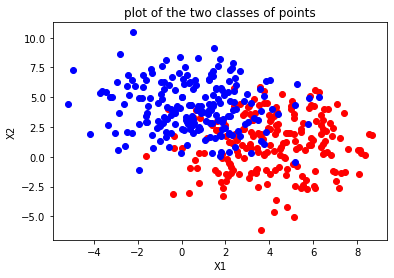

In [3]:
# first generate and plot the data 
# balanced case
# generate red and green dots from two Gaussian distribution
N1=200
N2=200
np.random.seed(20)
X01 = np.ones((N1,1))
X02 = np.ones((N2,1))
mu1=[4,1]
Sigma1=[[5,0], [0,5]]
mu2=[1,4]
Sigma2=[[5,0], [0,5]]
X1=np.random.multivariate_normal(mu1,Sigma1, size=N1)
y1=np.ones((N1,1))
y2=-np.ones((N2,1))
X2=np.random.multivariate_normal(mu2,Sigma2, size=N2)
Redx=np.hstack((X01,X1))
Bluex=np.hstack((X02,X2))
# combine two classes of dots
X=np.concatenate((X1,X2))
Xqp=np.concatenate((Redx, Bluex))
y=np.concatenate((y1,y2))
# plot these dots
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.title("plot of the two classes of points")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

coef of SVM from scikit-learn is  [array([-0.12569298]), 0.4699515173434078, -0.34682487602321177]


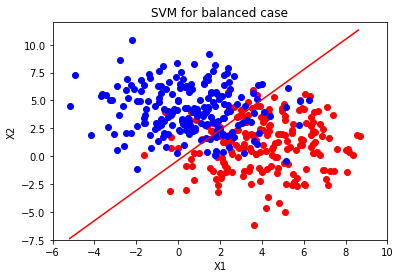

In [4]:
param_grid = {'C': (0.1)**np.arange(0,3)}
search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
search.fit(X, y.ravel())
I=-math.log10(search.best_params_['C'])
param_grid2 = {'C': (0.1)**np.arange(I-0.9,I+1, step=0.2)}
search2 = GridSearchCV(SVC(kernel='linear'), param_grid2, cv=5)
search2.fit(X, y.ravel())
Cbest=search2.best_params_['C']
# SVM
SVMsl=SVC(kernel='linear', C=Cbest)
SVMsl.fit(X, y.ravel())
print ("coef of SVM from scikit-learn is ", [SVMsl.intercept_,SVMsl.coef_[0][0], SVMsl.coef_[0][1]])
# result from SVM
beta0=SVMsl.intercept_[0]
beta1=SVMsl.coef_[0][0]
beta2=SVMsl.coef_[0][1]
# for later plot use
BETA0=beta0
BETA1=beta1
BETA2=beta2
linex=np.arange(np.amin(Xqp[:,1]),np.amax(Xqp[:,1]), step=0.2)
liney=-beta0/beta2-beta1/beta2*linex
#result from quadratic programming
#QPbeta0=QP[0]
#QPbeta1=QP[1]
#QPbeta2=QP[2]
#QPlinex=np.arange(min(Xqp[1]),max(Xqp[1]), step=0.2)
#QPliney=-QPbeta0/QPbeta2-QPbeta1/QPbeta2*QPlinex
# plot
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.plot(linex, liney, '-r')
#plt.plot(QPlinex, QPliney, '-r')
plt.title("SVM for balanced case")
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-7.5,12)
plt.xlim(-6,10)
plt.show()

## Generate unbalanced data and apply SVM

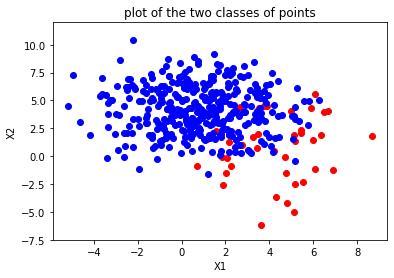

In [5]:
# first generate and plot the data 
# balanced case
# generate red and green dots from two Gaussian distribution
N1=40
N2=360
np.random.seed(20)
X01 = np.ones((N1,1))
X02 = np.ones((N2,1))
mu1=[4,1]
Sigma1=[[5,0], [0,5]]
mu2=[1,4]
Sigma2=[[5,0], [0,5]]
X1=np.random.multivariate_normal(mu1,Sigma1, size=N1)
y1=np.ones((N1,1))
y2=-np.ones((N2,1))
X2=np.random.multivariate_normal(mu2,Sigma2, size=N2)
Redx=np.hstack((X01,X1))
Bluex=np.hstack((X02,X2))
# combine two classes of dots
X=np.concatenate((X1,X2))
Xqp=np.concatenate((Redx, Bluex))
y=np.concatenate((y1,y2))
# plot these dots
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.title("plot of the two classes of points")
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-7.5,12)
plt.show()

coef of SVM from scikit-learn is  [array([-1.4264573]), 0.3414983909805045, -0.29867202509079505]


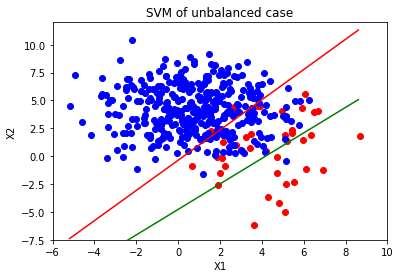

In [6]:
param_grid = {'C': (0.1)**np.arange(0,3)}
search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
search.fit(X, y.ravel())
I=-math.log10(search.best_params_['C'])
param_grid2 = {'C': (0.1)**np.arange(I-0.9,I+1, step=0.2)}
search2 = GridSearchCV(SVC(kernel='linear'), param_grid2, cv=5)
search2.fit(X, y.ravel())
Cbest=search2.best_params_['C']
# SVM
SVMsl=SVC(kernel='linear', C=Cbest)
SVMsl.fit(X, y.ravel())
print ("coef of SVM from scikit-learn is ", [SVMsl.intercept_,SVMsl.coef_[0][0], SVMsl.coef_[0][1]])
# result from SVM, unbalanced data
beta0=SVMsl.intercept_[0]
beta1=SVMsl.coef_[0][0]
beta2=SVMsl.coef_[0][1]
linex=np.arange(np.amin(Xqp[:,1]),np.amax(Xqp[:,1]), step=0.2)
liney=-beta0/beta2-beta1/beta2*linex
# result from SVM, balanced data
# plot
lineX=linex
lineY=-BETA0/BETA2-BETA1/BETA2*lineX
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.plot(linex, liney, '-g')
plt.plot(lineX, lineY, '-r')
plt.title("SVM of unbalanced case")
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-7.5,12)
plt.xlim(-6,10)
plt.show()

## Overall accuacy and accuacy for class one

In [14]:
# create data based on the proporation and calculate overall accuacy 
# and accuacy for one class
prop=np.arange(0.1,1,step=0.1)
N=2000
Allacc=list()
Oneacc=list()
np.random.seed(10)
for p in prop:
  print(p)
  # generate simulation dataset
  N1=int(N*p)
  N2=int(N-N1)
  X01 = np.ones((N1,1))
  X02 = np.ones((N2,1))
  mu1=[4,1]
  Sigma1=[[5,0], [0,5]]
  mu2=[1,4]
  Sigma2=[[5,0], [0,5]]
  X1=np.random.multivariate_normal(mu1,Sigma1, size=N1)
  y1=np.ones((N1,1))
  y2=-np.ones((N2,1))
  X2=np.random.multivariate_normal(mu2,Sigma2, size=N2)
  Redx=np.hstack((X01,X1))
  Bluex=np.hstack((X02,X2))
  # combine two classes of dots
  X=np.concatenate((X1,X2))
  Xqp=np.concatenate((Redx, Bluex))
  y=np.concatenate((y1,y2))

  # SVM with the best C
  param_grid = {'C': (0.1)**np.arange(-2,3)}
  search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
  search.fit(X, y.ravel())
  I=-math.log10(search.best_params_['C'])
  param_grid2 = {'C': (0.1)**np.arange(I-0.9,I+1, step=0.2)}
  search2 = GridSearchCV(SVC(kernel='linear'), param_grid2, cv=5)
  search2.fit(X, y.ravel())
  Cbest=search2.best_params_['C']
  SVMsl=SVC(kernel='linear', C=Cbest)
  SVMsl.fit(X, y.ravel())
  # get the overall accuacy
  ypred=SVMsl.predict(X)
  Allacc.append(sum(y.ravel()==ypred)/N)
  # get the accuacy for class with proportion of p
  Oneacc.append(sum(y[0:N1].ravel()==ypred[0:N1])/N1)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


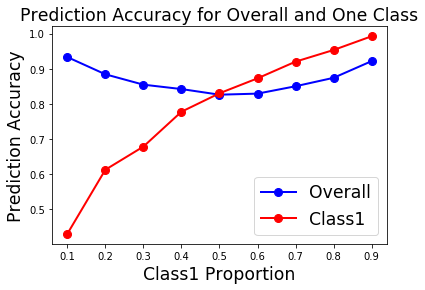

In [17]:
# plot out the result
import pandas as pd
df=pd.DataFrame({'x': prop, 'Overall': Allacc, 'Class1': Oneacc})
plt.plot( 'x', 'Overall', data=df, marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.plot( 'x', 'Class1', data=df, marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=2)
plt.xlabel("Class1 Proportion", fontsize='xx-large')
plt.ylabel("Prediction Accuracy", fontsize='xx-large')
plt.title("Prediction Accuracy for Overall and One Class", fontsize='xx-large')
plt.legend(fontsize = 'xx-large')

## Find best model by grid search

### Create training data

In [0]:
# create training data
N=400
np.random.seed(50)
p=0.2
N1=int(N*p)
N2=int(N-N1)
X01 = np.ones((N1,1))
X02 = np.ones((N2,1))
mu1=[4,1]
Sigma1=[[5,0], [0,5]]
mu2=[1,4]
Sigma2=[[5,0], [0,5]]
X1=np.random.multivariate_normal(mu1,Sigma1, size=N1)
y1=np.ones((N1,1))
y2=-np.ones((N2,1))
X2=np.random.multivariate_normal(mu2,Sigma2, size=N2)
Redx=np.hstack((X01,X1))
Bluex=np.hstack((X02,X2))
# combine two classes of dots
X=np.concatenate((X1,X2))
Xqp=np.concatenate((Redx, Bluex))
y=np.concatenate((y1,y2))

# SVM with the best C
param_grid = {'C': (0.1)**np.arange(-2,3)}
search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
search.fit(X, y.ravel())
I=-math.log10(search.best_params_['C'])
param_grid2 = {'C': (0.1)**np.arange(I-0.9,I+1, step=0.2)}
search2 = GridSearchCV(SVC(kernel='linear'), param_grid2, cv=5)
search2.fit(X, y.ravel())
Cbest=search2.best_params_['C']
Cbest

0.19952623149688795

In [0]:
y.shape

(400, 1)

### Create test data

In [0]:
# Create test data
Ntest=400
p=0.2
N1test=int(Ntest*p)
N2test=int(Ntest-N1test)
np.random.seed(40)
X01test = np.ones((N1test,1))
X02test = np.ones((N2test,1))
X1test=np.random.multivariate_normal(mu1,Sigma1, size=N1test)
y1test=np.ones((N1test,1))
y2test=-np.ones((N2test,1))
X2test=np.random.multivariate_normal(mu2,Sigma2, size=N2test)
Redxtest=np.hstack((X01test,X1test))
Bluextest=np.hstack((X02test,X2test))
# combine two classes of dots
Xtest=np.concatenate((X1test,X2test))
Xqptest=np.concatenate((Redxtest, Bluextest))
ytest=np.concatenate((y1test,y2test))

### Define a function to calculate loss


In [0]:
# first create the function to get loss
def getloss(X, y, Loss1, Loss2, beta0, beta1, beta2):
  # X is the covariate matrix, with dim of n*3
  # y is the label, +1 and -1
  # Loss1 is the loss for classifying 1 to -1
  # Loss2 is the loss for classifying -1 to 1
  # beta0, beta1, and beta2 are the coefficient for decision plane
  # decision function is y=beta0+beta1*x1+beta2*x2
  import numpy as np
  X=np.asmatrix(X)
  beta=np.array([beta0, beta1, beta2])
  beta=np.asmatrix(beta)
  ypred=-np.ones((X.shape[0],1))
  ypred[X@beta.T>0]=1
  Loss=0
  for i in range(X.shape[0]):
    yi=y[i].item()
    if yi-ypred[i]==2:
      Loss=Loss+Loss1
    if yi-ypred[i]==-2:
      Loss=Loss+Loss2
  return(Loss)

### Loss from regular SVM

In [0]:
# fit SVM model
SVMsl=SVC(kernel='linear', C=Cbest)
SVMsl.fit(X, y.ravel())
print ("coef of SVM from scikit-learn is ", [SVMsl.intercept_,SVMsl.coef_[0][0], SVMsl.coef_[0][1]])
trainlossSVM=getloss(X=Xqp, y=y, Loss1=3, Loss2=1, beta0=SVMsl.intercept_, beta1=SVMsl.coef_[0][0], beta2=SVMsl.coef_[0][1])
print("train loss from SVM", trainlossSVM)
testlossSVM=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=SVMsl.intercept_, beta1=SVMsl.coef_[0][0], beta2=SVMsl.coef_[0][1])
print("test loss from SVM", testlossSVM)

coef of SVM from scikit-learn is  [array([-0.78432482]), 0.3604408495296132, -0.38535972385778167]
train loss from SVM 114
test loss from SVM 116


### Grid search to find minimum loss

In [0]:
betabest=np.array([0,0,0])
beta0v=np.arange(-1,1,step=0.5)
beta1v=np.arange(-1,1,step=0.5)
beta2v=np.arange(-1,1,step=0.5)
Loss1=3
Loss2=1
Lossmin=Xqp.shape[0]*Loss1
# round 1
for beta0 in beta0v:
  print(beta0)
  for beta1 in beta1v:
    for beta2 in beta2v:
      temploss=getloss(X=Xqp, y=y, Loss1=Loss1, Loss2=Loss2, beta0=beta0, beta1=beta1, beta2=beta2)
      if temploss<Lossmin:
        betabest=np.array([beta0,beta1,beta2])
        Lossmin=temploss
print("Round 1")
print("best parameter combination is ", betabest)
print("minimal loss is ", Lossmin)

-1.0
-0.95
-0.8999999999999999
-0.8499999999999999
-0.7999999999999998
-0.7499999999999998
-0.6999999999999997
-0.6499999999999997
-0.5999999999999996
-0.5499999999999996
-0.49999999999999956
-0.4499999999999995
-0.39999999999999947
-0.3499999999999994
-0.2999999999999994
-0.24999999999999933
-0.1999999999999993
-0.14999999999999925
-0.0999999999999992
-0.049999999999999156
8.881784197001252e-16
0.05000000000000093
0.10000000000000098
0.15000000000000102
0.20000000000000107
0.2500000000000011
0.30000000000000115
0.3500000000000012
0.40000000000000124
0.4500000000000013
0.5000000000000013
0.5500000000000014
0.6000000000000014
0.6500000000000015
0.7000000000000015
0.7500000000000016
0.8000000000000016
0.8500000000000016
0.9000000000000017
0.9500000000000017
Round 1
best parameter combination is  [ 0.3   0.55 -0.6 ]
minimal loss is  69


In [0]:
# get loss for test data from grid search
testlossgrid=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=betabest[0], beta1=betabest[1], beta2=betabest[2])
print("test loss from grid search", testlossgrid)

test loss from grid search 98


## Try QP1

In [0]:
# get the number of parameters in beta, including beta_0
nbeta=Xqp.shape[1]
# get total number of samples
nsample=Xqp.shape[0]
G=np.identity(nbeta+nsample)
G[0,0]=0
for i in range(nbeta, nbeta+nsample):
  G[i,i]=0

# create C=np.concatenate(Q, O)
Q11=y*Xqp
Q12=np.zeros((nsample,nsample))
Q1=np.hstack((Q11, Q12))
Q21=np.zeros((nsample,nbeta))
Q22=np.identity(nsample)
Q2=np.hstack((Q21, Q22))
Q=Q1+Q2
# O=Q2
C=np.concatenate((Q, Q2))

# create b
# b = np.concatenate((b1, b2))
b1=np.ones((nsample))
b2=np.zeros((nsample))
b=np.concatenate((b1, b2))

tbest=1
lossmin=Loss1*nsample
tlist=np.arange(2, 4, step=0.1)
for t in tlist:
  print (t)
  # create a
  # a= np.concatenate((a1, a2))
  # define cost C
  C2=Cbest*5/(4+t)
  C1=C2*t
  a1=np.zeros((nbeta))
  a2=C1*(y**2+y)*0.5+C2*(y**2-y)*0.5
  a= np.concatenate((a1, a2.ravel()))

  # QP
  from cvxpy import *
  import numpy as np

  # optimization variables
  x=Variable(nsample+nbeta)

  # build optimization problem
  objective = Minimize( 0.5 * quad_form(x, G) + a.T * x )
  constraints = [ C * x >= b ]
  prob = Problem(objective, constraints)

  # solve optimization problem
  prob.solve()
  #print ("beta  =", x.value[0:nbeta])
  QP=x.value[0:nbeta]
  temploss=getloss(X=Xqp, y=y, Loss1=3, Loss2=1, beta0=QP[0], beta1=QP[1], beta2=QP[2])
  if temploss<lossmin:
    tbest=t
    lossmin=temploss
    QP1best=QP

print("best train loss is ", lossmin)
print("best t is ", tbest)
print("best QP coefficients are ", QP1best)
testloss1=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=QP1best[0], beta1=QP1best[1], beta2=QP1best[2])
print("test loss is ", testloss1)

2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6000000000000005
2.7000000000000006
2.8000000000000007
2.900000000000001
3.000000000000001
3.100000000000001
3.200000000000001
3.300000000000001
3.4000000000000012
3.5000000000000013
3.6000000000000014
3.7000000000000015
3.8000000000000016
3.9000000000000017
best train loss is  73
best t is  2.900000000000001
best QP coefficients are  [-0.30499854  0.54924535 -0.50415053]
test loss is  88


## Try QP2

In [0]:
# get the number of parameters in beta, including beta_0
nbeta=Xqp.shape[1]
# get total number of samples
nsample=Xqp.shape[0]



# create C=np.concatenate(Q, O)
Q11=y*Xqp
Q12=np.zeros((nsample,nsample))
Q1=np.hstack((Q11, Q12))
Q21=np.zeros((nsample,nbeta))
Q22=np.identity(nsample)
Q2=np.hstack((Q21, Q22))
Q=Q1+Q2
# O=Q2
C=np.concatenate((Q, Q2))

# create b
# b = np.concatenate((b1, b2))
b1=np.ones((nsample))
b2=np.zeros((nsample))
b=np.concatenate((b1, b2))

tbest=1
lossmin=Loss1*nsample
tlist=np.arange(1.9, 2.2, step=0.01)
for t in tlist:
  print(t)
  C2=Cbest*5/(4+t)
  C1=C2*t
  G=np.identity(nbeta+nsample)
  G[0,0]=0
  for i in range(nsample):
    yi=y[i].item()
    G[i+nbeta, i+nbeta]=C1*(yi**2+yi)+C2*(yi**2-yi)

  from cvxpy import *
  import numpy as np

  # optimization variables
  #x = Variable(5)
  x=Variable(nsample+nbeta)

  # build optimization problem
  objective = Minimize( 0.5 * quad_form(x, G))
  constraints = [ C * x >= b ]
  prob = Problem(objective, constraints)

  # solve optimization problem
  prob.solve()
  QP=x.value[0:nbeta]
  temploss=getloss(X=Xqp, y=y, Loss1=3, Loss2=1, beta0=QP[0], beta1=QP[1], beta2=QP[2])
  if temploss<lossmin:
    tbest=t
    lossmin=temploss
    QP2best=QP

print("temploss is ", lossmin)
print("best t is ", tbest)
print("best QP coefficients are ", QP2best)
testloss2=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=QP2best[0], beta1=QP2best[1], beta2=QP2best[2])
print("test loss is ", testloss2)

1.9
1.91
1.92
1.93
1.94
1.95
1.96
1.97
1.98
1.99
2.0
2.01
2.02
2.0300000000000002
2.04
2.05
2.06
2.0700000000000003
2.08
2.09
2.1
2.1100000000000003
2.12
2.13
2.14
2.1500000000000004
2.16
2.17
2.18
2.1900000000000004
2.2
temploss is  82
best t is  2.14
best QP coefficients are  [-0.22806692  0.23765481 -0.24524175]
test loss is  96


## Cross Validation QP1

In [0]:
np.random.seed(10)
Index=random.sample(range(Xqpall.shape[0]), Xqpall.shape[0])
Xqpall=Xqp[Index,:]
yall=y[Index]

In [0]:
tbest=1
lossmin=Loss1*nsample
tlist=np.arange(2, 4, step=0.1)
np.random.seed(10)
Index=random.sample(range(Xqpall.shape[0]), Xqpall.shape[0])
for t in tlist:
  #print (t)
  temploss=0
  for i in range(4):
    if i==0:
      tempXqptest=Xqpall[0:99,:]
      tempytest=yall[0:99,:]
      Xqp=Xqpall[99:399,:]
      y=yall[99:399]
    if i==1:
      Temp=np.concatenate((np.arange(0,99,step=1), np.arange(199, 399, step=1)))
      tempXqptest=Xqpall[99:199,:]
      tempytest=yall[99:199]
      Xqp=Xqpall[Temp,:]
      y=yall[Temp]
    if i==2:
      Temp=np.concatenate((np.arange(0,199,step=1), np.arange(299, 399, step=1)))
      tempXqptest=Xqpall[199:299,:]
      tempytest=yall[199:299]
      Xqp=Xqpall[Temp,:]
      y=yall[Temp]
    if i==3:
      tempXqptest=Xqpall[299:399,:]
      tempytest=yall[299:399]
      Xqp=Xqpall[0:299,:]
      y=yall[0:299]
    # get the number of parameters in beta, including beta_0
    nbeta=Xqp.shape[1]
    # get total number of samples
    nsample=Xqp.shape[0]
    G=np.identity(nbeta+nsample)
    G[0,0]=0
    for i in range(nbeta, nbeta+nsample):
      G[i,i]=0

    # create C=np.concatenate(Q, O)
    Q11=y*Xqp
    Q12=np.zeros((nsample,nsample))
    Q1=np.hstack((Q11, Q12))
    Q21=np.zeros((nsample,nbeta))
    Q22=np.identity(nsample)
    Q2=np.hstack((Q21, Q22))
    Q=Q1+Q2
    # O=Q2
    C=np.concatenate((Q, Q2))

    # create b
    # b = np.concatenate((b1, b2))
    b1=np.ones((nsample))
    b2=np.zeros((nsample))  
    b=np.concatenate((b1, b2))
    # create a
    # a= np.concatenate((a1, a2))
    # define cost C
    C2=Cbest*5/(4+t)
    C1=C2*t
    a1=np.zeros((nbeta))
    a2=C1*(y**2+y)*0.5+C2*(y**2-y)*0.5
    a= np.concatenate((a1, a2.ravel()))

    # QP
    from cvxpy import *
    import numpy as np

    # optimization variables
    x=Variable(nsample+nbeta)

    # build optimization problem
    objective = Minimize( 0.5 * quad_form(x, G) + a.T * x )
    constraints = [ C * x >= b ]
    prob = Problem(objective, constraints)

    # solve optimization problem
    prob.solve()
    #print ("beta  =", x.value[0:nbeta])
    QP=x.value[0:nbeta]
    temploss=getloss(X=tempXqptest, y=tempytest, Loss1=3, Loss2=1, beta0=QP[0], beta1=QP[1], beta2=QP[2])+temploss
  if temploss<lossmin:
    tbest=t
    lossmin=temploss
    QP1best=QP
  #print(temploss)

tbest1=tbest

#trainloss1=getloss(X=Xqpall, y=yall, Loss1=3, Loss2=1, beta0=QP1best[0], beta1=QP1best[1], beta2=QP1best[2])
#print("best train loss is ", trainloss1)
print("best t is ", tbest)
#print("best QP coefficients are ", QP1best)
#testloss1=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=QP1best[0], beta1=QP1best[1], beta2=QP1best[2])
#print("test loss is ", testloss1)

best t is  2.5000000000000004


In [0]:
Xqp=Xqpall
y=yall
# get the number of parameters in beta, including beta_0
nbeta=Xqp.shape[1]
# get total number of samples
nsample=Xqp.shape[0]
G=np.identity(nbeta+nsample)
G[0,0]=0
for i in range(nbeta, nbeta+nsample):
  G[i,i]=0

# create C=np.concatenate(Q, O)
Q11=y*Xqp
Q12=np.zeros((nsample,nsample))
Q1=np.hstack((Q11, Q12))
Q21=np.zeros((nsample,nbeta))
Q22=np.identity(nsample)
Q2=np.hstack((Q21, Q22))
Q=Q1+Q2
# O=Q2
C=np.concatenate((Q, Q2))

# create b
# b = np.concatenate((b1, b2))
b1=np.ones((nsample))
b2=np.zeros((nsample))
b=np.concatenate((b1, b2))

tbest=1
lossmin=Loss1*nsample
tlist=[tbest1]
for t in tlist:
  print (t)
  # create a
  # a= np.concatenate((a1, a2))
  # define cost C
  C2=Cbest*5/(4+t)
  C1=C2*t
  a1=np.zeros((nbeta))
  a2=C1*(y**2+y)*0.5+C2*(y**2-y)*0.5
  a= np.concatenate((a1, a2.ravel()))

  # QP
  from cvxpy import *
  import numpy as np

  # optimization variables
  x=Variable(nsample+nbeta)

  # build optimization problem
  objective = Minimize( 0.5 * quad_form(x, G) + a.T * x )
  constraints = [ C * x >= b ]
  prob = Problem(objective, constraints)

  # solve optimization problem
  prob.solve()
  #print ("beta  =", x.value[0:nbeta])
  QP=x.value[0:nbeta]
  temploss=getloss(X=Xqp, y=y, Loss1=3, Loss2=1, beta0=QP[0], beta1=QP[1], beta2=QP[2])
  if temploss<lossmin:
    tbest=t
    lossmin=temploss
    QP1best=QP

print("best train loss is ", lossmin)
print("best t is ", tbest)
print("best QP coefficients are ", QP1best)
testloss1=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=QP1best[0], beta1=QP1best[1], beta2=QP1best[2])
print("test loss is ", testloss1)

2.5000000000000004
best train loss is  78
best t is  2.5000000000000004
best QP coefficients are  [-0.35843788  0.55261344 -0.55233437]
test loss is  89


## Cross Validation for QP2

In [0]:
np.random.seed(10)
Index=random.sample(range(Xqpall.shape[0]), Xqpall.shape[0])
Xqpall=Xqp[Index,:]
yall=y[Index]

In [0]:
tbest=1
lossmin=Loss1*nsample
tlist=np.arange(1, 5, step=0.1)
np.random.seed(10)
Index=random.sample(range(Xqpall.shape[0]), Xqpall.shape[0])
for t in tlist:
  #print (t)
  temploss=0
  for i in range(4):
    if i==0:
      tempXqptest=Xqpall[0:99,:]
      tempytest=yall[0:99,:]
      Xqp=Xqpall[99:399,:]
      y=yall[99:399]
    if i==1:
      Temp=np.concatenate((np.arange(0,99,step=1), np.arange(199, 399, step=1)))
      tempXqptest=Xqpall[99:199,:]
      tempytest=yall[99:199]
      Xqp=Xqpall[Temp,:]
      y=yall[Temp]
    if i==2:
      Temp=np.concatenate((np.arange(0,199,step=1), np.arange(299, 399, step=1)))
      tempXqptest=Xqpall[199:299,:]
      tempytest=yall[199:299]
      Xqp=Xqpall[Temp,:]
      y=yall[Temp]
    if i==3:
      tempXqptest=Xqpall[299:399,:]
      tempytest=yall[299:399]
      Xqp=Xqpall[0:299,:]
      y=yall[0:299]
    # get the number of parameters in beta, including beta_0
    nbeta=Xqp.shape[1]
    # get total number of samples
    nsample=Xqp.shape[0]
    C2=Cbest*5/(4+t)
    C1=C2*t
    G=np.identity(nbeta+nsample)
    G[0,0]=0
    for i in range(nsample):
      yi=y[i].item()
      G[i+nbeta, i+nbeta]=C1*(yi**2+yi)+C2*(yi**2-yi)

    # create C=np.concatenate(Q, O)
    Q11=y*Xqp
    Q12=np.zeros((nsample,nsample))
    Q1=np.hstack((Q11, Q12))
    Q21=np.zeros((nsample,nbeta))
    Q22=np.identity(nsample)
    Q2=np.hstack((Q21, Q22))
    Q=Q1+Q2
    # O=Q2
    C=np.concatenate((Q, Q2))

    # create b
    # b = np.concatenate((b1, b2))
    b1=np.ones((nsample))
    b2=np.zeros((nsample))  
    b=np.concatenate((b1, b2))


    # QP
    from cvxpy import *
    import numpy as np

    # optimization variables
    x=Variable(nsample+nbeta)

    # build optimization problem
    objective = Minimize( 0.5 * quad_form(x, G) )
    constraints = [ C * x >= b ]
    prob = Problem(objective, constraints)

    # solve optimization problem
    prob.solve()
    #print ("beta  =", x.value[0:nbeta])
    QP=x.value[0:nbeta]
    temploss=getloss(X=tempXqptest, y=tempytest, Loss1=3, Loss2=1, beta0=QP[0], beta1=QP[1], beta2=QP[2])+temploss
  if temploss<lossmin:
    tbest=t
    lossmin=temploss
    QP1best=QP
  #print(temploss)

tbest2=tbest

#trainloss1=getloss(X=Xqpall, y=yall, Loss1=3, Loss2=1, beta0=QP1best[0], beta1=QP1best[1], beta2=QP1best[2])
#print("best train loss is ", trainloss1)
print("best t is ", tbest2)
#print("best QP coefficients are ", QP1best)
#testloss1=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=QP1best[0], beta1=QP1best[1], beta2=QP1best[2])
#print("test loss is ", testloss1)

best t is  2.7000000000000015


In [0]:
Xqp=Xqpall
y=yall
# get the number of parameters in beta, including beta_0
nbeta=Xqp.shape[1]
# get total number of samples
nsample=Xqp.shape[0]

# create C=np.concatenate(Q, O)
Q11=y*Xqp
Q12=np.zeros((nsample,nsample))
Q1=np.hstack((Q11, Q12))
Q21=np.zeros((nsample,nbeta))
Q22=np.identity(nsample)
Q2=np.hstack((Q21, Q22))
Q=Q1+Q2
# O=Q2
C=np.concatenate((Q, Q2))

# create b
# b = np.concatenate((b1, b2))
b1=np.ones((nsample))
b2=np.zeros((nsample))
b=np.concatenate((b1, b2))

tbest=1
lossmin=Loss1*nsample
tlist=[tbest2]
for t in tlist:
  print(t)
  C2=Cbest*5/(4+t)
  C1=C2*t
  G=np.identity(nbeta+nsample)
  G[0,0]=0
  for i in range(nsample):
    yi=y[i].item()
    G[i+nbeta, i+nbeta]=C1*(yi**2+yi)+C2*(yi**2-yi)

  from cvxpy import *
  import numpy as np

  # optimization variables
  #x = Variable(5)
  x=Variable(nsample+nbeta)

  # build optimization problem
  objective = Minimize( 0.5 * quad_form(x, G))
  constraints = [ C * x >= b ]
  prob = Problem(objective, constraints)

  # solve optimization problem
  prob.solve()
  QP=x.value[0:nbeta]
  temploss=getloss(X=Xqp, y=y, Loss1=3, Loss2=1, beta0=QP[0], beta1=QP[1], beta2=QP[2])
  if temploss<lossmin:
    tbest=t
    lossmin=temploss
    QP2best=QP

print("temploss is ", lossmin)
print("best t is ", tbest)
print("best QP coefficients are ", QP2best)
testloss2=getloss(X=Xqptest, y=ytest, Loss1=3, Loss2=1, beta0=QP2best[0], beta1=QP2best[1], beta2=QP2best[2])
print("test loss is ", testloss2)

2.7000000000000015
temploss is  77
best t is  2.7000000000000015
best QP coefficients are  [-0.15882879  0.24672445 -0.25062711]
test loss is  89


## Plot these model together

In [0]:
# create training data
N=400
np.random.seed(50)
p=0.2
N1=int(N*p)
N2=int(N-N1)
X01 = np.ones((N1,1))
X02 = np.ones((N2,1))
mu1=[4,1]
Sigma1=[[5,0], [0,5]]
mu2=[1,4]
Sigma2=[[5,0], [0,5]]
X1=np.random.multivariate_normal(mu1,Sigma1, size=N1)
y1=np.ones((N1,1))
y2=-np.ones((N2,1))
X2=np.random.multivariate_normal(mu2,Sigma2, size=N2)
Redx=np.hstack((X01,X1))
Bluex=np.hstack((X02,X2))
# combine two classes of dots
X=np.concatenate((X1,X2))
Xqp=np.concatenate((Redx, Bluex))
y=np.concatenate((y1,y2))

In [0]:
# result from SVM
SVMbeta0=SVMsl.intercept_[0]
SVMbeta1=SVMsl.coef_[0][0]
SVMbeta2=SVMsl.coef_[0][1]
linex=np.arange(np.amin(Xqp[:,1]),np.amax(Xqp[:,1]), step=0.2)
SVMliney=-SVMbeta0/SVMbeta2-SVMbeta1/SVMbeta2*linex

# result from grid search
GSbeta0=betabest[0]
GSbeta1=betabest[1]
GSbeta2=betabest[2]
GSliney=-GSbeta0/GSbeta2-GSbeta1/GSbeta2*linex

# result from Model 1
M1beta0=QP1best[0]
M1beta1=QP1best[1]
M1beta2=QP1best[2]
M1liney=-M1beta0/M1beta2-M1beta1/M1beta2*linex

# result from Model 2
M2beta0=QP2best[0]
M2beta1=QP2best[1]
M2beta2=QP2best[2]
M2liney=-M2beta0/M2beta2-M2beta1/M2beta2*linex

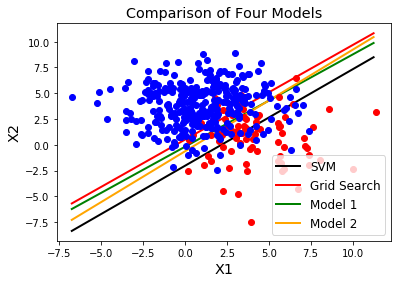

In [0]:
import pandas as pd
df=pd.DataFrame({'x': linex, 'SVM': SVMliney, 'GS': GSliney, 'M1':M1liney, 'M2':M2liney})
plt.plot( 'x', 'SVM', data=df, color='black', linewidth=2, label='SVM')
plt.plot( 'x', 'GS', data=df, color='red', linewidth=2, label='Grid Search')
plt.plot( 'x', 'M1', data=df, color='green', linewidth=2, label='Model 1')
plt.plot( 'x', 'M2', data=df, color='orange', linewidth=2, label='Model 2')
plt.xlabel("X1", fontsize='x-large')
plt.ylabel("X2", fontsize='x-large')
plt.title("Comparison of Four Models", fontsize='x-large')

plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')

plt.legend(fontsize = 'large')
